In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
werewolf_model_dict = {
    '1w_claude_on_claude': 'claude',
    '1w-gpt4-30': 'gpt',
    '1w-claude-sonn-30': 'claude',
    '1w_claude_sonn': 'claude',
    '1w_gpt4o': 'gpt',
    '1w_gpt_on_claude': 'gpt',
    '2w_claude_sonn': 'claude',
    '2w_gpt4': 'gpt'
}
town_model_dict = {
    '1w_claude_on_claude': 'claude',
    '1w-gpt4-30': 'gpt',
    '1w-claude-sonn-30': 'gpt',
    '1w_claude_sonn': 'gpt',
    '1w_gpt4o': 'gpt',
    '1w_gpt_on_claude': 'claude',
    '2w_claude_sonn': 'gpt',
    '2w_gpt4': 'gpt'
}

In [14]:
df = pd.read_csv('combined.csv')
df['town_model'] = df['game_type'].apply(lambda x: town_model_dict[x])
df['werewolf_model'] = df['game_type'].apply(lambda x: werewolf_model_dict[x])
df['player_model'] = df.apply(lambda x: werewolf_model_dict[x['game_type']] if x['player_role'] == 'Werewolf' else town_model_dict[x['game_type']], axis=1)

In [18]:
# plot average utterance length, by role and model

metrics = ['number_of_votes', 'times_spoken', 'average_utterance_length', 'accusation_influence', 'accusation_influence_on_votes']
roles = list(set(df['player_role']))
models = list(set(df['player_model']))
d = {model:{metric:{role:{} for role in roles} for metric in metrics} for model in models}
for model in models:
    for role in roles:
        df_subset = df[(df['player_role'] == role) & (df['player_model'] == model)]
        for metric in metrics:
            d[model][metric][role] = df_subset[metric].mean()

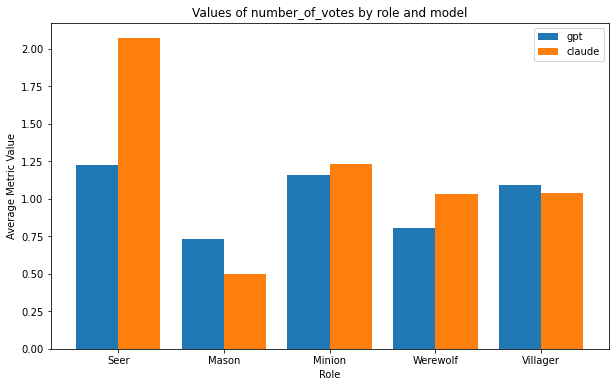

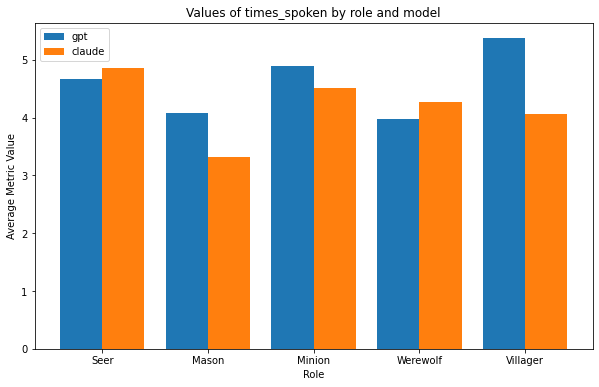

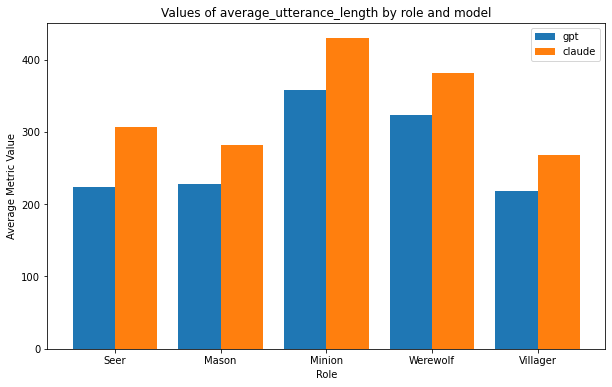

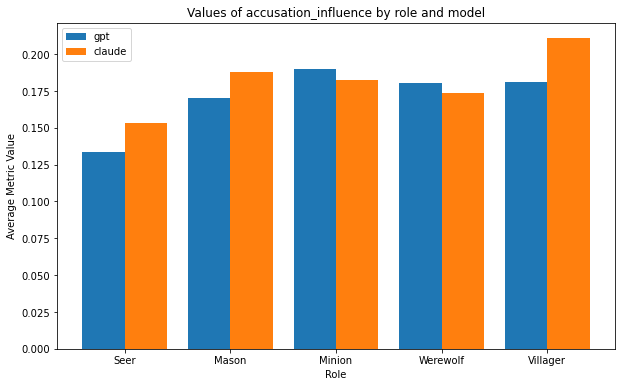

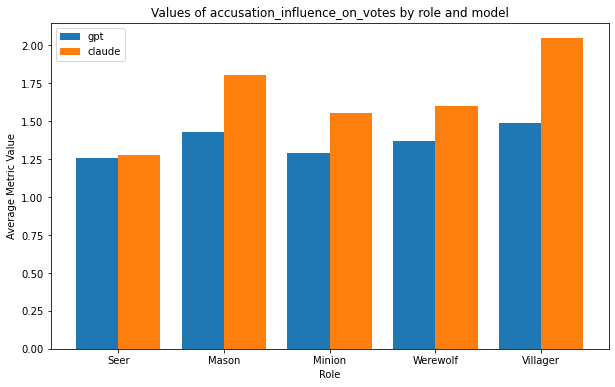

In [24]:
# for each metric, plot gpt and claude values of metric based on role side by side
for metric in metrics:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    ax.bar(np.arange(len(roles)), [d['gpt'][metric][role] for role in roles], width=0.4, label='GPT-4o')
    ax.bar(np.arange(len(roles)) + 0.4, [d['claude'][metric][role] for role in roles], width=0.4, label='Claude Sonnet 3.5')
    ax.set_xticks(np.arange(len(roles)) + 0.2)
    ax.set_xticklabels(roles)
    ax.set_title(metric)
    ax.legend()
    plt.title(f'Values of {metric} by role and model')
    plt.xlabel('Role')
    plt.ylabel('Average Metric Value')
    # plt.show()
    plt.savefig('figures/' + metric + '.png')
    plt.clf()